##  Importing  libraries

In [78]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [79]:
from sklearn.feature_selection import mutual_info_classif

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm  import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


In [81]:
!pip install imblearn

In [82]:
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN


In [83]:
import joblib

In [84]:
#loading data
df = pd.read_csv('Data Projet.csv')

##  Analyzing the data

In [85]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   branch    1200 non-null   int64  
 1   ncust     1200 non-null   int64  
 2   customer  1200 non-null   int64  
 3   age       1200 non-null   int64  
 4   ed        1200 non-null   object 
 5   employ    1200 non-null   int64  
 6   address   1200 non-null   int64  
 7   income    1200 non-null   int64  
 8   debtinc   1200 non-null   float64
 9   creddebt  1200 non-null   float64
 10  othdebt   1200 non-null   float64
 11  default   1200 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 112.6+ KB


,branch,ncust,customer,age,employ,address,income,debtinc,creddebt,othdebt
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,52.196667,3478.205000,257694.200000,34.130833,6.950000,6.281667,59.960000,9.967167,1.945998,3.887205
std,28.009822,863.284183,139959.135031,13.323913,9.110525,6.143054,69.831324,6.717606,2.993344,5.506351
min,3.000000,1919.000000,10012.000000,18.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000
25%,20.000000,2658.000000,98136.500000,23.000000,0.000000,1.000000,27.000000,4.875000,0.409002,1.111377
50%,64.000000,3491.000000,316154.000000,31.000000,3.000000,5.000000,39.000000,8.500000,0.950550,2.220708
75%,75.000000,4358.000000,370743.500000,41.250000,10.000000,9.000000,64.000000,13.600000,2.219280,4.542486
max,91.000000,4809.000000,453777.000000,79.000000,63.000000,34.000000,1079.000000,40.700000,35.972690,63.472640


In [86]:
df

,branch,ncust,customer,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,3,3017,10012,28,Bac+2,7,2,44,17.7,2.990592,4.797408,Non
1,3,3017,10017,64,Bac+5 et plus,34,17,116,14.7,5.047392,12.004608,Non
2,3,3017,10030,40,Niveau bac,20,12,61,4.8,1.042368,1.885632,Non
3,3,3017,10039,30,Niveau bac,11,3,27,34.5,1.751220,7.563780,Non
4,3,3017,10071,35,Niveau bac,2,9,38,10.9,1.462126,2.679874,Oui
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,91,3779,453461,31,Bac+2,3,6,24,12.9,0.736848,2.359152,Oui
1196,91,3779,453578,37,Bac+2,10,8,43,3.6,0.806508,0.741492,Non
1197,91,3779,453686,25,Bac+5 et plus,0,3,16,3.2,0.288256,0.223744,Non
1198,91,3779,453698,34,Niveau bac,10,8,41,14.5,1.194945,4.750055,Non


In [87]:
df.isnull().sum() / df.shape[0]

branch      0.0
ncust       0.0
customer    0.0
age         0.0
ed          0.0
employ      0.0
address     0.0
income      0.0
debtinc     0.0
creddebt    0.0
othdebt     0.0
default     0.0
dtype: float64

##  Preprocessing the data frame

In [88]:
def translate(x):
    x['default'] = x['default'].apply(lambda x: "Yes" if x == "Oui" else "No" if x == "Non" else x)
    x["default"] = pd.Categorical(x["default"])
    return x

df_1=translate(df)

In [89]:
def text_to_num(x):
    x["ed"], _ = pd.factorize(x["ed"])
    return x 
df_1=text_to_num(df_1)

In [90]:
def cred(x):
    x['cred'] = x['debtinc'] / x['creddebt'] 
    x.cred= x.cred.fillna(0, inplace=False)
    x['cred']= x['cred'] - x['income'] + x['othdebt']
    return x
df_1=cred(df_1)

In [91]:
#calculated the information gain for the features
selector = SelectKBest(score_func=f_classif)
X_new = selector.fit_transform(df_1.drop(columns='default'), df_1.default)

In [92]:
selector.scores_

array([  0.71500498,   0.36091231,   0.69381319, 120.46013415,
         2.39643213, 115.85208162, 100.64062151,  13.19059984,
       166.01550353,  35.75457729,   6.36150063,   5.5581103 ])

In [93]:
def drop(x):
    x= x.drop(columns=["ncust","branch","customer","ed","income","othdebt"])
    return x

In [94]:
df_1.to_csv('default1.csv')

In [95]:
# pipeline dor data processing and cleaning 
translate_p=FunctionTransformer(translate)
credit_p=FunctionTransformer(cred)
txt_to_n= FunctionTransformer(text_to_num)
dropf = FunctionTransformer(drop)

steps =[('txt_to_n', txt_to_n),('credit', credit_p),('drop', dropf)]

pipeline_pre = Pipeline(steps)


In [96]:
def remove_outliers_zscore(data, threshold=3):
    # Calculate the Z-scores of each data point
    z = np.abs(data - np.mean(data)) / np.std(data)
    
    # Identify the data points with Z-scores greater than the threshold
    outliers = np.where(z > threshold)
    
    # Remove the outliers
    data_without_outliers = np.delete(data, outliers)
    
    return data_without_outliers
df_1['income']=df_1['income'].apply(remove_outliers_zscore).astype(float)
df_1['debtinc']=df_1['debtinc'].apply(remove_outliers_zscore).astype(float)
df_1['creddebt']=df_1['creddebt'].apply(remove_outliers_zscore).astype(float)
df_1['othdebt']=df_1['othdebt'].apply(remove_outliers_zscore).astype(float)

In [97]:
df_1.columns

Index(['branch', 'ncust', 'customer', 'age', 'ed', 'employ', 'address',
       'income', 'debtinc', 'creddebt', 'othdebt', 'default', 'cred'],
      dtype='object')

In [98]:
df_1

,branch,ncust,customer,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,cred
0,3,3017,10012,28,0,7,2,44.0,17.7,2.990592,4.797408,No,-33.284031
1,3,3017,10017,64,1,34,17,116.0,14.7,5.047392,12.004608,No,-101.082997
2,3,3017,10030,40,2,20,12,61.0,4.8,1.042368,1.885632,No,-54.509468
3,3,3017,10039,30,2,11,3,27.0,34.5,1.751220,7.563780,No,0.264332
4,3,3017,10071,35,2,2,9,38.0,10.9,1.462126,2.679874,Yes,-27.865228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,91,3779,453461,31,0,3,6,24.0,12.9,0.736848,2.359152,Yes,-4.133845
1196,91,3779,453578,37,0,10,8,43.0,3.6,0.806508,0.741492,No,-37.794820
1197,91,3779,453686,25,1,0,3,16.0,3.2,0.288256,0.223744,No,-4.675013
1198,91,3779,453698,34,2,10,8,41.0,14.5,1.194945,4.750055,No,-24.115495


In [99]:
# seperated the predictive and target variables 
x=df_1.drop(columns=["ncust","branch","customer","ed","othdebt",'income','default'],axis=1)
y=df_1["default"]


In [100]:
#splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,shuffle= True)

In [101]:
#scaled the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
#oversampling 
ros = RandomOverSampler(random_state=42,sampling_strategy=1)

# fit and transform the training dataset
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)




In [103]:
#undersampling

rus = RandomUnderSampler(random_state=42)

# fit and transform the training dataset
X_train_resampled2, y_train_resampled2 = rus.fit_resample(X_train, y_train)


In [104]:
# smote

smote_enn = SMOTEENN(random_state=42)

# fit and transform the training dataset
X_train_resampled1, y_train_resampled1 = smote_enn.fit_resample(X_train, y_train)

In [105]:
print(Counter(y_train_resampled))


Counter({'No': 607, 'Yes': 607})


## Experimenting with Machine Learning algorithms

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.9303819444444444
Accuracy score for category  SVC is:  71.25 %
              precision    recall  f1-score   support

          No       0.85      0.63      0.73       145
         Yes       0.60      0.83      0.70        95

    accuracy                           0.71       240
   macro avg       0.73      0.73      0.71       240
weighted avg       0.75      0.71      0.71       240



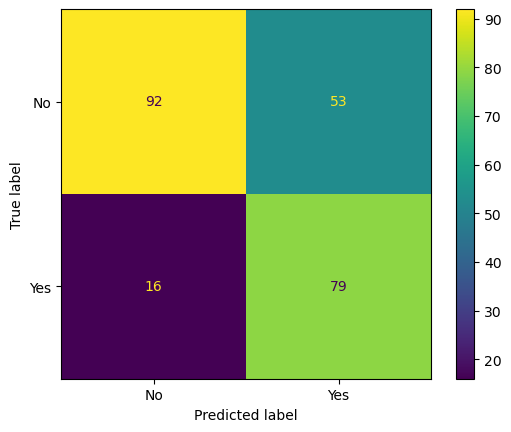

In [106]:
# Support vector machine 

# Define the parameter grid
param_grid_svm = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf']}

# Initialize the SVM classifier
svm = SVC()

# Create the GridSearchCV object
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=10)

# Fit the GridSearchCV object to the data
grid_search_svm.fit(X_train_resampled1, y_train_resampled1)

# Print the best parameters and best score
print("Best Parameters:", grid_search_svm.best_params_)
print("Best Score:", grid_search_svm.best_score_)
predictions = grid_search_svm.predict(X_test)
print("Accuracy score for category  SVC is: ", accuracy_score(y_test, predictions) * 100, '%')
print(classification_report(y_test, predictions))
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=["No", "Yes"])
conf_matrix_display.plot()

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.7408051143741884
Accuracy score for  rf classifier is:  71.25 %
              precision    recall  f1-score   support

          No       0.80      0.70      0.75       145
         Yes       0.62      0.73      0.67        95

    accuracy                           0.71       240
   macro avg       0.71      0.71      0.71       240
weighted avg       0.73      0.71      0.72       240



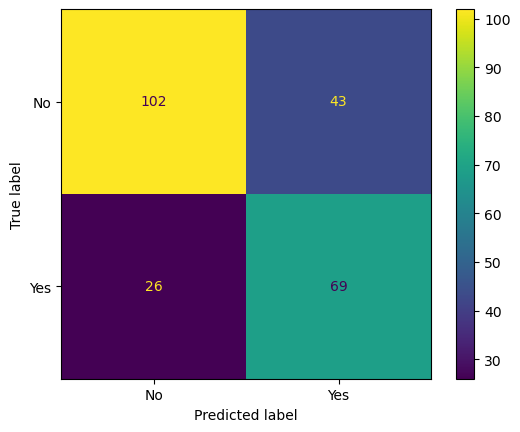

In [107]:
# RandomForest


# Define the parameter grid
param_grid_rf = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}

# Initialize the rf classifier
rf = RandomForestClassifier()

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)

# Fit the GridSearchCV object to the data
grid_search_rf.fit(X_train_resampled2, y_train_resampled2)

# Print the best parameters and best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)
predictions = grid_search_rf.predict(X_test)

print("Accuracy score for  rf classifier is: ", accuracy_score(y_test, predictions) * 100, '%')

print(classification_report(y_test, predictions))
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=["No", "Yes"])
conf_matrix_display.plot()

In [ ]:
# KNN

# Define the parameter grid
param_grid_knn = {'n_neighbors': [3,5,7,9,11],
              'weights': ['uniform', 'distance']}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create the grid search object
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=10, n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_knn.fit(X_train_resampled1, y_train_resampled1)

# Print the best parameters and the best score
print("Best parameters: ", grid_search_knn.best_params_)
print("Best score: ", grid_search_knn.best_score_)
predictions = grid_search_knn.predict(X_test)
print("Accuracy score for  KNN  classifier is: ", accuracy_score(y_test, predictions) * 100, '%')


print(classification_report(y_test, predictions))

cmap = plt.get_cmap('Blues')

conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=["No", "Yes"])
conf_matrix_display.plot(cmap=cmap)
plt.title("Confusion Matrix KNN")

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters:  {'n_neighbors': 3, 'weights': 'distance'}
Best score:  0.9762400793650793
Accuracy score for  KNN  classifier is:  70.0 %
              precision    recall  f1-score   support

          No       0.89      0.57      0.70       145
         Yes       0.58      0.89      0.70        95

    accuracy                           0.70       240
   macro avg       0.74      0.73      0.70       240
weighted avg       0.77      0.70      0.70       240



Text(0.5, 1.0, 'Confusion Matrix KNN')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Best parameters:  {}
Best score:  0.8607594936708861
Accuracy score for Naive Bayes classifier is:  61.66666666666667 %
              precision    recall  f1-score   support

          No       0.86      0.43      0.58       145
         Yes       0.51      0.89      0.65        95

    accuracy                           0.62       240
   macro avg       0.69      0.66      0.61       240
weighted avg       0.72      0.62      0.61       240



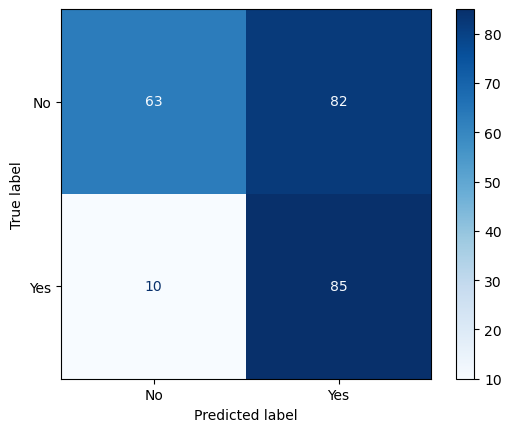

In [109]:
# Naive Bayes

# Define the parameter grid
param_grid_nb = {}

# Create a Naive Bayes classifier
nb = GaussianNB()

# Create the grid search object
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=4, n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search_nb.fit(X_train_resampled1, y_train_resampled1)

print("Best parameters: ", grid_search_nb.best_params_)
print("Best score: ", grid_search_nb.best_score_)
predictions = grid_search_nb.predict(X_test)
print("Accuracy score for Naive Bayes classifier is: ", accuracy_score(y_test, predictions) * 100, '%')

print(classification_report(y_test, predictions))

cmap = plt.get_cmap('Blues')
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=["No", "Yes"])
conf_matrix_display.plot(cmap=cmap)

Best parameters:  {'C': 0.1, 'penalty': 'l2'}
Best score:  0.7521925881530317
Accuracy score for category  LR is:  73.33333333333333 %
              precision    recall  f1-score   support

          No       0.82      0.71      0.76       145
         Yes       0.63      0.77      0.70        95

    accuracy                           0.73       240
   macro avg       0.73      0.74      0.73       240
weighted avg       0.75      0.73      0.74       240



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

Text(0.5, 1.0, 'Confusion Matrix Plot Title')

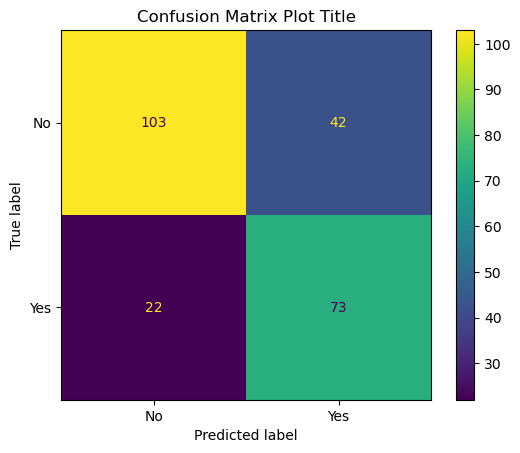

In [124]:
#logistic regression

# Define the parameter grid for logistic regression
param_grid_lr = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Create the logistic regression model
logistic_regression = LogisticRegression()

# Create the GridSearchCV object
grid_search_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5)

# Fit the GridSearchCV object to the data
grid_search_lr.fit(X_train_resampled2, y_train_resampled2)

# Print the best parameters and the best score
print("Best parameters: ", grid_search_lr.best_params_)
print("Best score: ", grid_search_lr.best_score_)
predictions = grid_search_lr.predict(X_test)
print("Accuracy score for category  LR is: ", accuracy_score(y_test, predictions) * 100, '%')
print(classification_report(y_test, predictions))
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=["No", "Yes"])
conf_matrix_display.plot()


Best parameters: {'loss': 'log', 'penalty': 'elasticnet'}
Best score: 0.7124954922466643
Accuracy score for category  sgd is:  70.83333333333334 %
              precision    recall  f1-score   support

          No       0.82      0.66      0.73       145
         Yes       0.60      0.78      0.68        95

    accuracy                           0.71       240
   macro avg       0.71      0.72      0.71       240
weighted avg       0.73      0.71      0.71       240



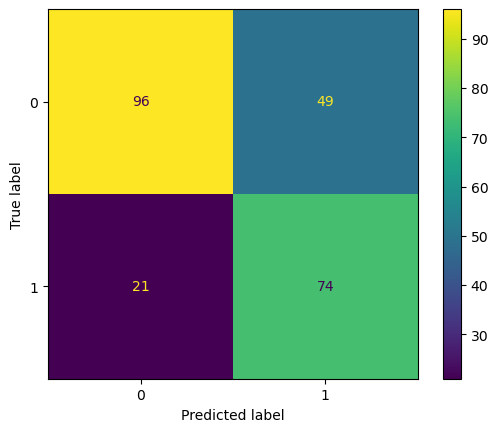

In [111]:
#SGD


# Define the SGD classifier
sgd = SGDClassifier(max_iter=1000, tol=1e-3)

# Define the grid search parameters
param_grid_sgd = {'loss': ['hinge', 'log', 'modified_huber'],
              'penalty': ['l1', 'l2', 'elasticnet']}

# Create the grid search object
grid_search_sgd = GridSearchCV(sgd, param_grid_sgd, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search_sgd.fit(X_train_resampled2, y_train_resampled2)

# Get the best parameters
best_params_sgd = grid_search_sgd.best_params_

# Get the best score
best_score_sgd = grid_search_sgd.best_score_
predictions = grid_search_sgd.predict(X_test)
print('Best parameters:', best_params)
print('Best score:', best_score)
print("Accuracy score for category  sgd is: ", accuracy_score(y_test, predictions) * 100, '%')
print(classification_report(y_test, predictions))
conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)
conf_matrix_display.plot()

## Model building 

In [112]:
steps_ML = [('knn',KNeighborsClassifier(n_neighbors= 3, weights = 'distance'))]

# Create the pipeline
pipeline_model = Pipeline(steps_ML)

# Fit the pipeline to the training data
pipeline_model.fit(X_train_resampled1, y_train_resampled1)
y_pred = pipeline_model.predict(X_test)

# Generate a classification report
print(classification_report(y_test, y_pred))
# Evaluate the pipeline on the test data
pipeline_model.score(X_test, y_test)

              precision    recall  f1-score   support

          No       0.89      0.57      0.70       145
         Yes       0.58      0.89      0.70        95

    accuracy                           0.70       240
   macro avg       0.74      0.73      0.70       240
weighted avg       0.77      0.70      0.70       240



0.7

In [113]:
joblib.dump(pipeline_model, "pipeline.joblib")

['pipeline.joblib']

In [114]:
model = joblib.load("pipeline.joblib")

## Applying the model to new data 

In [115]:
df_new = pd.read_csv('Data Projet New.csv')

In [116]:
df_new1 = pipeline_pre.fit_transform(df_new)


In [117]:
df_new['default']=model.predict(scaler.transform(df_new1))

In [118]:
df_new.head(50)


,branch,ncust,customer,age,ed,employ,address,income,debtinc,creddebt,othdebt,cred,default
0,3,3017,10069,25,0,2,2,30,22.4,0.759360,5.960640,5.459165,Yes
1,3,3017,10449,56,1,27,21,125,8.5,2.900625,7.724375,-114.345222,No
2,3,3017,10474,25,0,8,3,37,8.3,0.948939,2.122061,-26.131328,No
3,3,3017,10798,23,2,0,2,42,6.7,1.584282,1.229718,-36.541237,Yes
4,3,3017,10802,19,1,0,0,21,2.0,0.276360,0.143640,-13.619423,Yes
5,3,3017,10884,45,3,9,11,48,10.2,3.525120,1.370880,-43.735601,No
6,3,3017,10887,39,2,8,9,259,7.2,1.547784,17.100216,-237.247972,No
7,3,3017,10935,55,4,34,16,150,9.9,0.727650,14.122350,-122.272208,No
8,3,3017,11337,52,4,23,10,153,4.5,2.120580,4.764420,-146.113519,No
9,3,3017,11466,52,0,5,18,36,9.8,1.400616,2.127384,-26.875695,No


In [119]:
print(Counter(df_new.default))

Counter({'No': 152, 'Yes': 148})


In [120]:
####df_new.to_csv('default_new.csv')